# Stock Price Prediction using historical data

import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("henryshan/google-stock-price")

!mv {path} data/

100%|██████████| 114k/114k [00:00<00:00, 292kB/s]

Extracting files...


In [3]:
df = pd.read_csv("/content/data/GOOG.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


In [5]:
stock_prices=pd.DataFrame(df["Close"])

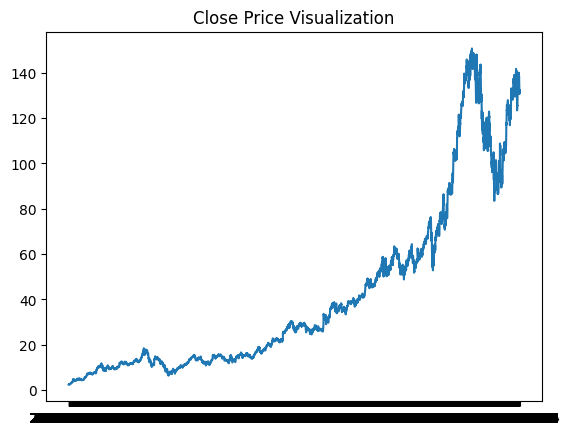

In [8]:
plt.title("Close Price Visualization")
plt.plot(df.Date,df.Close)

# Linear Regression model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
# Separate the Input and Output Columns
X = df[['High','Low','Open','Volume']].values
y = df['Close'].values

In [29]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

Evaluate the model

In [32]:
eval = model.score(X_test, y_test)
print("Model Accuracy:", eval)

Model Accuracy: 0.9999146938099462


In [33]:
# Mean Square Error
mse = mean_squared_error(y_test, y_pred)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
# R2 Score
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 0.1336405015087727
Mean Absolute Error: 0.19655976820420326
R2 Score: 0.9999146938099462


In [34]:
# Combine the Actual and Predicted data
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted.head(20)

,Actual,Predicted
0,15.546229,15.523316
1,124.639999,123.560915
2,114.564003,114.386605
3,12.775614,12.799975
4,56.844002,56.489632
5,53.990002,54.012669
6,141.675003,141.334523
7,39.088001,38.993883
8,10.793294,10.858182
9,65.649498,65.702800


# LSTM model

In [38]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [39]:
# Creating sequences of data
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 50
X, y = create_sequences(df_close, seq_length)

In [40]:
print(X.shape)
print(y.shape)

(4808, 50, 1)
(4808, 1)


In [41]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))

# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 50)             │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 32)                  │          10,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,625 (584.47 KB)

 Trainable params: 149,625 (584.47 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                       validation_split=0.1, verbose=1)

Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 1.0453e-04 - loss: 0.0154 - val_accuracy: 0.0000e+00 - val_loss: 4.6681e-04
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 6.3136e-05 - loss: 5.1006e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.9392e-04
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 2.3400e-04 - loss: 4.3602e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.5346e-04
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 5.0577e-05 - loss: 4.2150e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.5209e-04
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 2.7012e-05 - loss: 4.8542e-04 - val_accuracy: 0.0000e+00 - val_loss: 3.3789e-04
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 3.9517e-04 - loss: 3.9306e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.5408e-04
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 2.0086e-04 - loss: 5.9308e-04 - val_accuracy: 0.0000e+00 - val_loss: 

In [45]:
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the predictions
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 2.7098e-04
Test Loss: [0.0002640426973812282, 0.0]


In [47]:
train_predict=model.predict(X_train) #prediction
test_predict=model.predict(X_test)

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


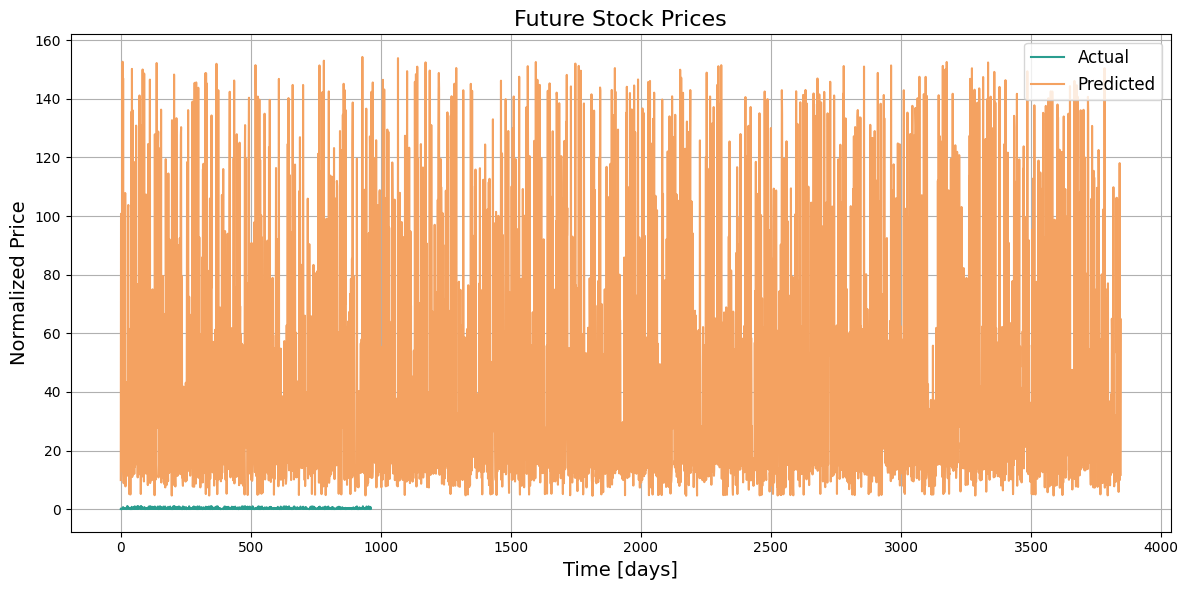

In [51]:
plt.figure(figsize=(12, 6))
idx = 0
plt.plot(y_test, color='#2a9d8f', label='Actual')
plt.plot(train_predict, color='#f4a261', label='Predicted')
plt.title('Future Stock Prices', fontsize=16)
plt.xlabel('Time [days]', fontsize=14)
plt.ylabel('Normalized Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()